### Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf

### Importing Dataset

In [10]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
pd.DataFrame(dataset)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


### Describing Dataset

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [12]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [13]:
dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

##### Extracting closing price

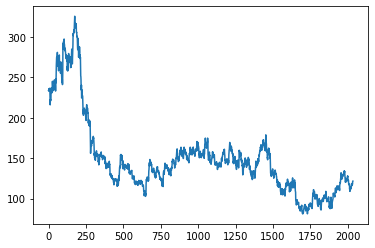

In [14]:
plt.plot(dataset['Close'])

##### Sorting with date

In [15]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset_new = dataset.sort_values(by='Date')
dataset_new.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [16]:
dataset_new.reset_index(inplace=True)
dataset_new.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


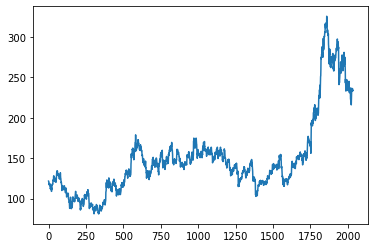

In [18]:
plt.plot(dataset_new['Close'])

In [22]:
dataset_close = dataset_new['Close']
dataset_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

##### Using MaxMin Scaler for minimizing range

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
dataset_close = sc.fit_transform(np.array(dataset_close).reshape(-1,1))

In [24]:
dataset_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

### Splitting dataset into training and test set

In [25]:
split_size_train = int(len(dataset_close)*0.75)
split_size_test = int(len(dataset_close)*0.25)

In [26]:
train_dataset = dataset_close[0:split_size_train,:]
test_dataset = dataset_close[split_size_test:,:]

In [27]:
train_dataset

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.25020425],
       [0.25020425],
       [0.23999183]])

In [28]:
test_dataset

array([[0.1621732 ],
       [0.17034314],
       [0.18811275],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [29]:
def make_dataset(dataset,time=1):
    x,y=[],[]
    for i in range(len(dataset)-time-1):
        temp = dataset[i:(i+time),0]
        x.append(temp)
        y.append(dataset[i+time,0])
    return np.array(x),np.array(y)

In [30]:
time = 100
x_train,y_train = make_dataset(train_dataset,time)
x_test,y_test = make_dataset(test_dataset,time)

In [31]:
x_train

array([[0.16584967, 0.16319444, 0.1621732 , ..., 0.14011438, 0.13848039,
        0.12479575],
       [0.16319444, 0.1621732 , 0.14971405, ..., 0.13848039, 0.12479575,
        0.12254902],
       [0.1621732 , 0.14971405, 0.15400327, ..., 0.12479575, 0.12254902,
        0.13010621],
       ...,
       [0.15747549, 0.15277778, 0.1621732 , ..., 0.24223856, 0.24571078,
        0.24775327],
       [0.15277778, 0.1621732 , 0.15951797, ..., 0.24571078, 0.24775327,
        0.24836601],
       [0.1621732 , 0.15951797, 0.16707516, ..., 0.24775327, 0.24836601,
        0.25020425]])

In [32]:
x_test

array([[0.1621732 , 0.17034314, 0.18811275, ..., 0.34395425, 0.33496732,
        0.32638889],
       [0.17034314, 0.18811275, 0.18831699, ..., 0.33496732, 0.32638889,
        0.3255719 ],
       [0.18811275, 0.18831699, 0.2005719 , ..., 0.32638889, 0.3255719 ,
        0.32352941],
       ...,
       [0.86519608, 0.84027778, 0.84497549, ..., 0.62888072, 0.62765523,
        0.62234477],
       [0.84027778, 0.84497549, 0.87111928, ..., 0.62765523, 0.62234477,
        0.63378268],
       [0.84497549, 0.87111928, 0.85273693, ..., 0.62234477, 0.63378268,
        0.62622549]])

In [33]:
y_train

array([0.12254902, 0.13010621, 0.13541667, ..., 0.24836601, 0.25020425,
       0.25020425])

In [34]:
y_test

array([0.3255719 , 0.32352941, 0.32148693, ..., 0.63378268, 0.62622549,
       0.62214052])

In [35]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_train.shape[1],1)

### Building LSTM Model

##### Initializing model

In [36]:
model = tf.keras.models.Sequential()

##### Adding input layer and first input layer

In [37]:
model.add(tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=(100,1)))

#### Adding second layer

In [38]:
model.add(tf.keras.layers.LSTM(units=50,return_sequences=True))

##### Adding output layer

In [39]:
model.add(tf.keras.layers.LSTM(units=50))

##### Adding Dense Layer

In [40]:
model.add(tf.keras.layers.Dense(units=1))

##### Compiling model

In [41]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Training Model

In [48]:
model.fit(x_train,y_train,batch_size=48,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
30/30 [==============================] - 4s 129ms/step - loss: 1.1975e-04 - val_loss: 5.3573e-04
Epoch 2/100
30/30 [==============================] - 4s 126ms/step - loss: 1.2018e-04 - val_loss: 4.9012e-04
Epoch 3/100
30/30 [==============================] - 4s 135ms/step - loss: 1.2802e-04 - val_loss: 5.8108e-04
Epoch 4/100
30/30 [==============================] - 4s 130ms/step - loss: 1.1933e-04 - val_loss: 8.2705e-04
Epoch 5/100
30/30 [==============================] - 4s 129ms/step - loss: 1.2776e-04 - val_loss: 6.8552e-04
Epoch 6/100
30/30 [==============================] - 4s 141ms/step - loss: 1.2000e-04 - val_loss: 6.3909e-04
Epoch 7/100
30/30 [==============================] - 4s 127ms/step - loss: 1.2620e-04 - val_loss: 5.7461e-04
Epoch 8/100
30/30 [==============================] - 4s 136ms/step - loss: 1.3055e-04 - val_loss: 5.5334e-04
Epoch 9/100
30/30 [==============================] - 5s 164ms/step - loss: 1.2522e-04 - val_loss: 5.8400e-04
Epoch 10/100
30/30 

30/30 [==============================] - 6s 206ms/step - loss: 1.2117e-04 - val_loss: 6.1919e-04
Epoch 76/100
30/30 [==============================] - 6s 204ms/step - loss: 1.2474e-04 - val_loss: 8.3253e-04
Epoch 77/100
30/30 [==============================] - 6s 208ms/step - loss: 1.2370e-04 - val_loss: 5.2057e-04
Epoch 78/100
30/30 [==============================] - 6s 193ms/step - loss: 1.2433e-04 - val_loss: 0.0011
Epoch 79/100
30/30 [==============================] - 6s 191ms/step - loss: 1.2405e-04 - val_loss: 7.5521e-04
Epoch 80/100
30/30 [==============================] - 5s 168ms/step - loss: 1.2050e-04 - val_loss: 6.2080e-04
Epoch 81/100
30/30 [==============================] - 5s 174ms/step - loss: 1.2198e-04 - val_loss: 6.3072e-04
Epoch 82/100
30/30 [==============================] - 5s 174ms/step - loss: 1.5879e-04 - val_loss: 8.3946e-04
Epoch 83/100
30/30 [==============================] - 5s 163ms/step - loss: 1.3158e-04 - val_loss: 6.7326e-04
Epoch 84/100
30/30 [=======

In [49]:
train_pred = sc.inverse_transform(model.predict(x_train))
test_pred = sc.inverse_transform(model.predict(x_test))

45/45 [==============================] - 1s 30ms/step


In [50]:
# calculating root mean square errors
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_pred)))
print(math.sqrt(mean_squared_error(y_test,test_pred)))

132.98701105919645
167.36070786175134


In [51]:
test_pred

array([[159.74486],
       [159.73114],
       [159.30734],
       ...,
       [225.11198],
       [228.27078],
       [225.35393]], dtype=float32)

### Visualising Results

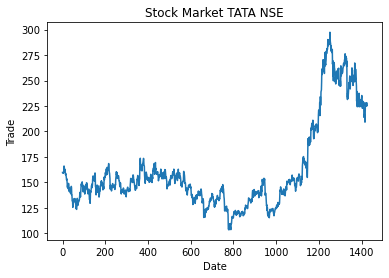

In [59]:
plt.title("Stock Market TATA NSE")
plt.plot(test_pred)
plt.xlabel('Date')
plt.ylabel('Trade')
plt.show()